# 4. Tuning the parameters of KNN

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [47]:
#load the files

X_train = pd.read_csv('../data/x_y_data/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

In [8]:
X_train.shape

(7750, 18)

In [9]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/soichi

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [26]:
knn1= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, weights= 'distance')

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" KNN: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 KNN: 0.9278709677419356 (0.05363599518223136)


By the parameter {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}, it reached the mean:0.92.

In [27]:
names = ["knn"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,knn
0,0.870968
1,0.870968
2,0.886452
3,0.846452
4,0.905806
5,0.972903
6,0.979355
7,0.984516
8,0.979355
9,0.981935


In [75]:
#save the score
score.to_csv('../data/score/after_tuning_parameter/KNN/knn_cross_val_accuracy.csv', index=False)

In [30]:
#save the model
knn1.fit(X_train, y_train)

filename = "../models/knn.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(knn1,file)

#### recall

In [78]:

results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" KNN: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 KNN: 0.9832337891270807 (0.017429739547407876)


In [79]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.939394
1,1.000000
2,1.000000
3,0.972973
4,1.000000
5,0.994810
6,0.979355
7,0.984516
8,0.979355
9,0.981935


In [80]:
score2.to_csv('../data/score/after_tuning_parameter/KNN/knn_cross_val_recall.csv', index=False)

### Cross validation socre -Precision-

In [82]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="recall")

results3.append(cv_results3)
    
msg3 = f" KNN: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

score3.to_csv('../data/score/after_tuning_parameter/KNN/knn_cross_val_precision.csv', index=False)

 KNN: 0.9832337891270807 (0.017429739547407876)


,precision
0,0.939394
1,1.000000
2,1.000000
3,0.972973
4,1.000000
5,0.994810
6,0.979355
7,0.984516
8,0.979355
9,0.981935


### Cross validation socre -f1-

In [83]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(knn1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" KNN: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

score4.to_csv('../data/score/after_tuning_parameter/KNN/knn_cross_val_f1.csv', index=False)

 KNN: 0.7181888277127297 (0.27364618220757453)


,f1
0,0.382716
1,0.479167
2,0.516484
3,0.376963
4,0.482270
5,0.982067
6,0.989570
7,0.992198
8,0.989570
9,0.990885


### Variable Importance 

To quantify how much the feature contributes to the model's ability to capture patterns and make accurate predictions, look at the variable importance.

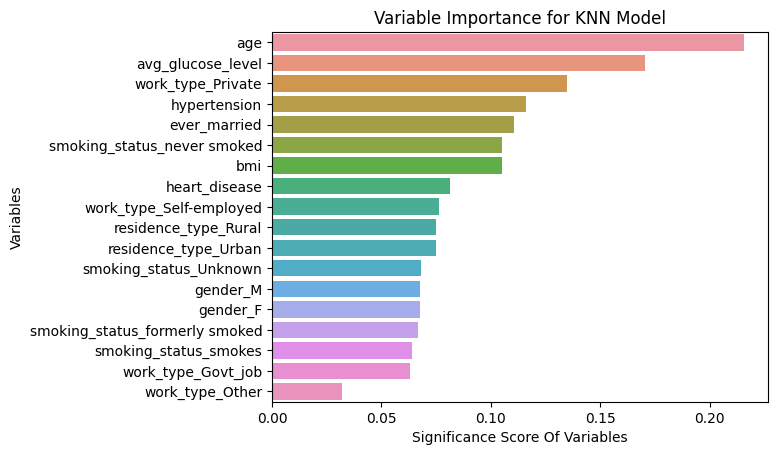

In [54]:
X_train2 = pd.read_csv('../data/x_y_data/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/y_resampled.csv')


knn_tuned = knn1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(knn1, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for KNN Model")
plt.show()


In [58]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
age,0.215910
avg_glucose_level,0.170671
work_type_Private,0.134774
hypertension,0.115910
ever_married,0.110568
smoking_status_never smoked,0.105329
bmi,0.104968
heart_disease,0.081419
work_type_Self-employed,0.076194
residence_type_Rural,0.075071


In [60]:
# change the columns' name 
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df

,Significance Score
age,0.215910
avg_glucose_level,0.170671
work_type_Private,0.134774
hypertension,0.115910
ever_married,0.110568
smoking_status_never smoked,0.105329
bmi,0.104968
heart_disease,0.081419
work_type_Self-employed,0.076194
residence_type_Rural,0.075071


In [76]:
#save
feature_importances_df.to_csv('../data/score/Significant_Score/KNN_Significance_Score.csv', index=False)

### the classification report

In [69]:
from sklearn.metrics import confusion_matrix


y_pred = knn1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[860, 112],
       [ 33,  15]])

In [71]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    893
1    127
Name: count, dtype: int64

In [73]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

0    972
1     48
Name: count, dtype: int64

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = knn1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.857843
1,Precision,0.118110
2,Recall,0.312500
3,F1-Score,0.171429
4,Kappa,0.110686


In [74]:
metrics_df.to_csv('../data/metrics/knn_metrics.csv', index=False)